In [ ]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

Tue Sep 26 08:39:28 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
ln: failed to create symbolic link '/mydrive/My Drive': File exists
 123123_1.pdf
 abalone-detection-and-tracking.zip
 abalone.mp4
 aftefall.csv
'Colab Notebooks'
'Copy of obj.data'
 dnn_model.h5
 emergencyfall
'fall detection.v5.zip'
 falling_df.csv
 finedust
 frames
 frames.zip
 generate_train.py
'GRADUATION 27.02.2020'
 images
'KIBET DUNCAN IMMUNIZATION CERT.pdf'
'LF1A-02Wbottom (3).zip'
 lie_df.csv
 lie_down_df.csv
 model2-Copy2.ipynb
 MVI_0511.MP4
'My Drive'
 my_model.h5
'non-emergency fall'
 obj.data
 obj.names
 pose_deploy_linevec_faster_4_stages.prototxt
 pose_estimation_data.csv
 posepose.ipynb
 results.avi
 sit_down_df.csv
 sleeping_df.csv
 speed_falling_df.csv
 speed_lie_down_df.csv
 speed_sit_down_df.csv
 speed_standing_df.csv
 speed_stand_up_df.csv
 standing_df.csv
 stand_up_df.csv
 train
'transformer model.ipynb'
 yolov3
 yolov31
 yolov3_custo

In [ ]:
import pandas as pd
from pandas import read_csv
import numpy as np
from numpy import concatenate
from pandas import DataFrame, Series
from datetime import datetime

from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

filename = '/content/gdrive/MyDrive/falling_df.csv'
falling = pd.read_csv(filename).values

filename = '/content/gdrive/MyDrive/stand_up_df.csv'
stand_up = pd.read_csv(filename).values

filename = '/content/gdrive/MyDrive/standing_df.csv'
standing = pd.read_csv(filename).values

filename = '/content/gdrive/MyDrive/lie_down_df.csv'
lie_down = pd.read_csv(filename).values

filename = '/content/gdrive/MyDrive/sit_down_df.csv'
sit_down = pd.read_csv(filename).values

filename = '/content/gdrive/MyDrive/lie_df.csv'
lie_df = pd.read_csv(filename).values

In [ ]:
len(falling)

9900

In [ ]:
len(stand_up)

9900

In [ ]:
len(standing)

9900

In [ ]:
len(lie_down)

8019

In [ ]:
len(sit_down)

9900

In [ ]:
import pandas as pd

# List of file paths and corresponding dataframes
file_paths = [
    '/content/gdrive/MyDrive/falling_df.csv',
    '/content/gdrive/MyDrive/stand_up_df.csv',
    '/content/gdrive/MyDrive/standing_df.csv',
    '/content/gdrive/MyDrive/lie_down_df.csv',
    '/content/gdrive/MyDrive/sit_down_df.csv',
    '/content/gdrive/MyDrive/lie_df.csv'
]

dfs = [pd.read_csv(file_path) for file_path in file_paths]

# Columns to be dropped
cols_to_drop = ['midpoint_1', 'midpoint_2', 'central_point']

# Drop the columns and save back to the original files
for i, df in enumerate(dfs):
    if all(col in df.columns for col in cols_to_drop): # Check if all columns exist
        df.drop(columns=cols_to_drop, inplace=True)
        df.to_csv(file_paths[i], index=False)


In [ ]:
# Read the CSV files
falling_df = pd.read_csv('/content/gdrive/MyDrive/falling_df.csv')
stand_up_df = pd.read_csv('/content/gdrive/MyDrive/stand_up_df.csv')
standing_df = pd.read_csv('/content/gdrive/MyDrive/standing_df.csv')
lie_down_df = pd.read_csv('/content/gdrive/MyDrive/lie_down_df.csv')
sit_down_df = pd.read_csv('/content/gdrive/MyDrive/sit_down_df.csv')
lie_df = pd.read_csv('/content/gdrive/MyDrive/lie_df.csv')

# Convert the dataframes to numpy arrays
falling = falling_df.values
stand_up = stand_up_df.values
standing = standing_df.values
lie_down = lie_down_df.values
sit_down = sit_down_df.values
lie = lie_df.values

# Reshape the arrays
falling_reshaped = falling.reshape(round(falling.shape[0]/99), 99, falling.shape[1])
stand_up_reshaped = stand_up.reshape(round(stand_up.shape[0]/99), 99, stand_up.shape[1])
standing_reshaped = standing.reshape(round(standing.shape[0]/99), 99, standing.shape[1])
lie_down_reshaped = lie_down.reshape(round(lie_down.shape[0]/99), 99, lie_down.shape[1])
sit_down_reshaped = sit_down.reshape(round(sit_down.shape[0]/99), 99, sit_down.shape[1])
lie_reshaped = lie.reshape(round(lie.shape[0]/99), 99, lie.shape[1])

# Concatenate the arrays
x = np.concatenate([falling, stand_up, standing, lie_down, sit_down, lie], axis=0)

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(x)

# Reshape the scaled array
scaled_reshaped = scaled.reshape(round(scaled.shape[0]/99), 99, scaled.shape[1])
print(scaled_reshaped.shape)
print(scaled_reshaped[0].shape)

(581, 99, 136)
(99, 136)


In [ ]:
import numpy as np
falling_y = np.zeros((falling_reshaped.shape[0],), dtype=int)
print(falling_y.shape)
print(falling_y[0])


import numpy as np
stand_up_y = np.ones((stand_up_reshaped.shape[0],), dtype=int)
print(stand_up_y.shape)
print(stand_up_y[0])


import numpy as np
standing_y = np.ones((standing_reshaped.shape[0],), dtype=int) * 2
print(standing_y.shape)
print(standing_y[0])

import numpy as np
lie_down_y = np.ones((lie_down_reshaped.shape[0],), dtype=int) * 3
print(lie_down_y.shape)
print(lie_down_y[0])


import numpy as np
sit_down_y = np.ones((sit_down_reshaped.shape[0],), dtype=int) * 4
print(sit_down_y.shape)
print(sit_down_y[0])


import numpy as np
lie_y = np.ones((lie_reshaped.shape[0],), dtype=int) * 5
print(lie_y.shape)
print(lie_y[0])


(100,)
0
(100,)
1
(100,)
2
(81,)
3
(100,)
4
(100,)
5


In [ ]:
#merging data
from numpy import concatenate
# x = concatenate([falling, emergency],axis=0)
y = concatenate([falling_y, stand_up_y, standing_y, lie_down_y, sit_down_y, lie_y],axis=0)
print(scaled_reshaped.shape)
print(y.shape)

(581, 99, 134)
(581,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_reshaped, y, test_size=0.2, shuffle=True, stratify=y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
# one_hot_vec_size = train_y.shape[1]
# print("one hot encoding vector size is ", one_hot_vec_size)

(464, 99, 134)
(117, 99, 134)
(464,)
(117,)


In [ ]:
y_test

array([0, 0, 4, 3, 5, 4, 0, 4, 0, 2, 3, 4, 2, 4, 5, 3, 3, 5, 4, 4, 3, 2,
       2, 5, 2, 4, 2, 0, 4, 0, 1, 1, 5, 0, 5, 1, 2, 0, 2, 3, 0, 1, 3, 1,
       5, 1, 5, 0, 3, 2, 4, 2, 2, 5, 2, 1, 0, 4, 3, 4, 2, 3, 4, 4, 4, 5,
       0, 3, 5, 2, 1, 2, 4, 5, 1, 5, 4, 1, 5, 1, 4, 2, 0, 0, 1, 5, 5, 0,
       5, 1, 4, 3, 0, 2, 4, 0, 3, 3, 5, 5, 1, 5, 0, 2, 1, 2, 3, 0, 1, 2,
       1, 3, 1, 1, 3, 0, 1])

In [ ]:
# n_classes = len(np.unique(y_train))

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
n_classes = 6

In [ ]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0.4):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

In [ ]:
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    # Define input layer
    inputs = keras.Input(shape=input_shape)

    # Build transformer blocks
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    # Apply global average pooling and MLP
    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)

    # Define output layer
    outputs = layers.Dense(n_classes, activation="softmax")(x)

    # Build model
    model = keras.Model(inputs, outputs)

    return model

In [ ]:
from tensorflow.keras.optimizers.schedules import CosineDecay

# Define model architecture and compile it
input_shape = x_train.shape[1:]
model = build_model(
    input_shape,
    head_size=256,
    num_heads=6,
    ff_dim=16,
    num_transformer_blocks=6,  # Increased num_transformer_blocks from 4 to 6
    mlp_units=[256],
    mlp_dropout=0.2,
    dropout=0.1,
)
lr_schedule = CosineDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Add L2 regularization
for layer in model.layers:
    if isinstance(layer, layers.Dense):
        layer.kernel_regularizer = tf.keras.regularizers.l2(1e-4)

# Define callbacks
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)]

# Train the model
history = model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    epochs=1000,
    batch_size=32,
    callbacks=callbacks,
)

# Evaluate the model on test data
model.evaluate(x_test, y_test, verbose=1)

Epoch 1/1000
12/12 [==============================] - 33s 193ms/step - loss: 1.8281 - accuracy: 0.2210 - val_loss: 1.5935 - val_accuracy: 0.3011
Epoch 2/1000
12/12 [==============================] - 1s 104ms/step - loss: 1.4616 - accuracy: 0.3450 - val_loss: 1.3277 - val_accuracy: 0.3871
Epoch 3/1000
12/12 [==============================] - 1s 105ms/step - loss: 0.9851 - accuracy: 0.5687 - val_loss: 0.7514 - val_accuracy: 0.6559
Epoch 4/1000
12/12 [==============================] - 1s 98ms/step - loss: 0.7857 - accuracy: 0.6388 - val_loss: 0.5530 - val_accuracy: 0.7419
Epoch 5/1000
12/12 [==============================] - 1s 100ms/step - loss: 0.6674 - accuracy: 0.6765 - val_loss: 0.5799 - val_accuracy: 0.7097
Epoch 6/1000
12/12 [==============================] - 1s 105ms/step - loss: 0.5975 - accuracy: 0.7305 - val_loss: 0.4505 - val_accuracy: 0.7527
Epoch 7/1000
12/12 [==============================] - 1s 101ms/step - loss: 0.5443 - accuracy: 0.7358 - val_loss: 0.4559 - val_accuracy:

[0.4186224639415741, 0.9230769276618958]

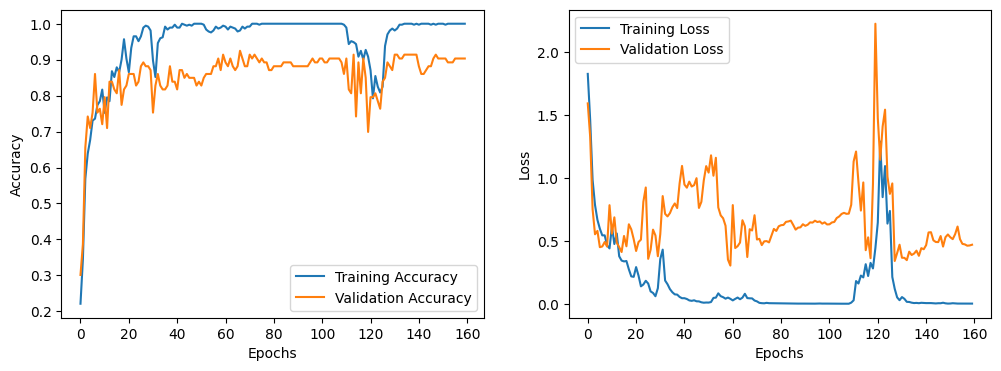

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(history)

In [ ]:
import os
import tensorflow as tf

# define the model and train it

# create a directory to save the model
save_dir = 'saved_models'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# save the model
model.save(os.path.join(save_dir, 'my_model.h5'))

In [ ]:
scores = model.evaluate(x_train, y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))

scores = model.evaluate(x_test, y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

15/15 [==============================] - 1s 33ms/step - loss: 0.0753 - accuracy: 0.9828
Training Accuracy: 98.28%

4/4 [==============================] - 0s 29ms/step - loss: 0.4186 - accuracy: 0.9231
Testing Accuracy: 92.31%



In [ ]:
from sklearn.metrics import classification_report

# Get the predicted labels
yhat = model.predict(x_test)
predicted_labels = np.argmax(yhat, axis=1)
class_names = ['falling', 'stand_up', 'standing', 'lie_down', 'sit_down', 'lie']
# Print the classification report
print(classification_report(y_test, predicted_labels, target_names=class_names))

4/4 [==============================] - 1s 26ms/step
              precision    recall  f1-score   support

     falling       0.83      0.95      0.88        20
    stand_up       1.00      0.95      0.97        20
    standing       0.95      1.00      0.98        20
    lie_down       0.94      0.94      0.94        17
    sit_down       0.90      0.95      0.93        20
         lie       0.94      0.75      0.83        20

    accuracy                           0.92       117
   macro avg       0.93      0.92      0.92       117
weighted avg       0.93      0.92      0.92       117



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
p = precision_score(y_test, predicted_labels, average='weighted')
print('precision_score =', p)
r = recall_score(y_test, predicted_labels, average='weighted')
print('recall_score =', r)
f1 = f1_score(y_test, predicted_labels, average='weighted')
print('f1_score =', f1)

precision_score = 0.926620480968307
recall_score = 0.9230769230769231
f1_score = 0.9220260277461727


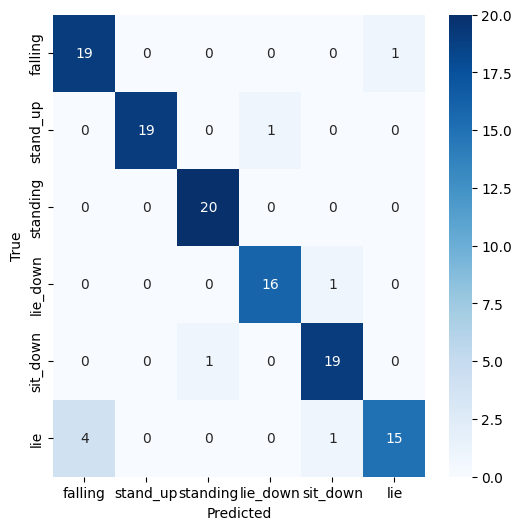

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define class names
class_names = ['falling', 'stand_up', 'standing', 'lie_down', 'sit_down', 'lie']

# Create confusion matrix
cm = confusion_matrix(y_test, predicted_labels)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Set axis labels
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

4/4 [==============================] - 0s 27ms/step


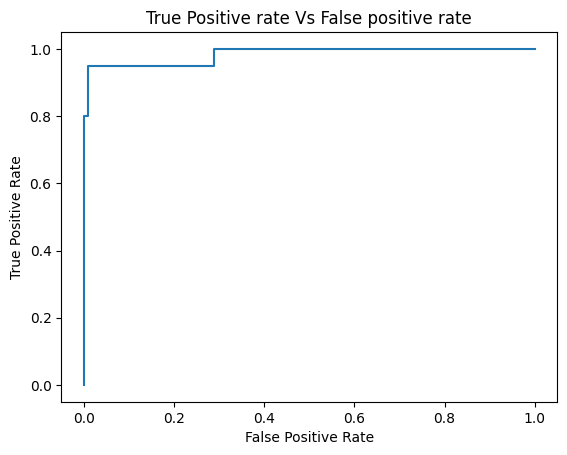

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import pandas as pd

# Compute predicted probabilities for each class
probs = model.predict(x_test)

# Generate ROC curve for the first class
fpr, tpr, thresholds = roc_curve(y_test == 0, probs[:, 0])

# Create a DataFrame to store the results
roc = pd.DataFrame({
    'FPR(Fall-out)': fpr,
    'TPRate(Recall)': tpr,
    'Threshold': thresholds
})

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('True Positive rate Vs False positive rate')
plt.show()

In [ ]:
# threshold 최대값의 인덱스, np.argmax()
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print('idx:', optimal_idx, ', threshold:', optimal_threshold)

idx: 4 , threshold: 0.9611834


In [ ]:
##############optimal threshold 기준 예측##################
predict =  (model.predict(x_test) >= optimal_threshold)

# 1의 예측값만 불러와도 되므로 [:,1]사용
predict = predict.astype(int)
print(predict)
print(y_test)

4/4 [==============================] - 0s 26ms/step
[[1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 1 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 1 0 0]
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 0 1]
 [0 0 1 0 0 0]
 [0 0 0 0 0 0]
 [0 0 1 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [1 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]
 [1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 1 0 0]
 [0 1 0 0 0 0]
 [0 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 1 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 0]
 [0

In [ ]:
import numpy as np
y_pred = np.argmax(predict, axis=1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

     falling       0.43      0.95      0.59        20
    stand_up       1.00      0.95      0.97        20
    standing       1.00      1.00      1.00        20
    lie_down       0.94      0.94      0.94        17
    sit_down       0.83      0.25      0.38        20
         lie       0.91      0.50      0.65        20

    accuracy                           0.76       117
   macro avg       0.85      0.77      0.76       117
weighted avg       0.85      0.76      0.75       117



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
p = precision_score(y_test, predicted_labels, average='weighted')
print('precision_score =', p)
r = recall_score(y_test, predicted_labels, average='weighted')
print('recall_score =', r)
f1 = f1_score(y_test, predicted_labels, average='weighted')
print('f1_score =', f1)

precision_score = 0.926620480968307
recall_score = 0.9230769230769231
f1_score = 0.9220260277461727


              precision    recall  f1-score   support

     falling       0.43      0.95      0.59        20
    stand_up       1.00      0.95      0.97        20
    standing       1.00      1.00      1.00        20
    lie_down       0.94      0.94      0.94        17
    sit_down       0.83      0.25      0.38        20
         lie       0.91      0.50      0.65        20

    accuracy                           0.76       117
   macro avg       0.85      0.77      0.76       117
weighted avg       0.85      0.76      0.75       117



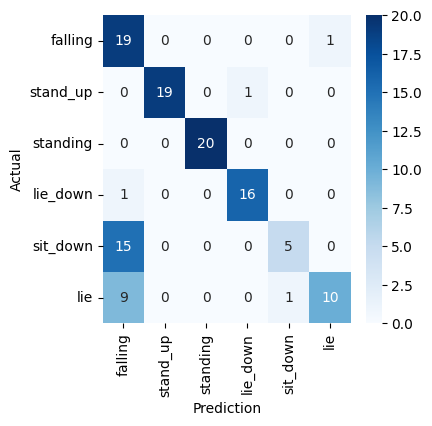

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# convert predictions to multiclass format
y_pred = np.argmax(predict, axis=1)

# print classification report
print(classification_report(y_test, y_pred, target_names=class_names))

# plot confusion matrix
plt.figure(figsize=(4,4))
cm = confusion_matrix(y_test, y_pred, labels=range(n_classes))
ax = sns.heatmap(cm, annot=True, xticklabels=class_names, yticklabels=class_names,
                 fmt='d', cmap='Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()